# Data Engineering and Data Science Concepts and Experience


### Question 1. Feedback Loop

How would you build a feedback loop to monitor and increase customer growth over time? Try to give a specific example specifying types of data sets, metrics, and processes.

**Answer** <br>
There are 4 stages in the customer feedback loop: <br>
1. Collecting customer feedback
2. Analyzing the feedback
3. Apply feedback and testing
4. Follow-up with customers

#### 1. Collecting Customer Feedback

It is very important for us to ask for customer feedback and understand what drives their satisfaction. Returning customers helps to grow a business fast and their recommendations would attract more new customers.

There are three scenarios we should pay attention to:
1. Overall trends in customer satisfaction over time
2. Service issues
3. Product issues

To collect the information above, there are some common ways:
* Customer surverys
* Live chat
* Social media monitoring
* Feature request boards

<br><br>
**Metrics** <br><br>
There are 4 types of metrics help to measure customers' satisfaction with overall process, services or products:
* Net Promoter Score (NPS)
* Customer Satisfaction Score (CSAT)
* Customer Effort Scores (CES)
* Social Media Monitoring



1) _Net Promoter Score (NPS)_ <br>
Customers are give a question with a scale of 1 to 10 (Detractors 0-6, Passives 7-8, Promoters 9-10) for measuring the likelihood a person will recommend the product or service <br>
**NPS = percentage of promoters - percentage of detractors**

2) _Customer Satisfaction Score (CSAT)_ <br>
Customers are given a question with emojis, text, stars or numeric rating scales to determine how helpful the solution was for the customer <br>
**CSAT = percentage of customers who are satisfied**

3) _Customer Effort Scores (CES)_ <br>
Customers are given  a question with emojis, text, stars or numeric rating scales to measure how easy or difficult for customers to interact with services and products <br>
Due to the varied types of scales, we just calculate the **average**

4) _Social Media Monitoring_ <br> 
There are tools and NLP models for us to analyze customers' **sentiment** (positive/neutral/negative)

**Example** <br>
The data sets may have following variables: <br>
* user_id,customer_id, transaction_id
* sign_in_date, transaction_date
* transaction_location_coordinates, location_coordinates
* product_type, transaction_amount
* NPS, CSAT, CES


#### 2. Analyzing the Feedback

To monitor the overall trends in customer satisfaction, we could track the time-series data of **NPS**. Also, we could build a dashboard to describe the change of distribution of promoters/passives/detractors over time.

To assess the quality of service, **CSAT** is a great metric. Due to the varied types of scales, the calculation of CSAT might vary. The question ask customers how satisfied they were with the whole support interaction and we calculate the percentage of customers who showed satisfction.

To evaluate how much effort was required by customers to ge their problem solved or how easily to use the product, **CES** really helps. It also has a high correlation with future customer loyalty.

#### 3. Apply the Feedback and testing

Based on our analysis of metrics, we share the feedback with product team, customer support team and marketing & sales team at intervals (real time / daily / weekly / monthly). Each time they made a change on the product or service, we could do the analysis on time and compared with previous results.

In this step, we could build a dashboad to present analysis of the feedback internally.

#### 4. Follow-up with Customers

There are some ways to follow up with the customers to notify them that a problem has been fixed or a suggestion has been implemented. The most common way is to send thank-you letters to customers who offered extremely valuable feedback, provided very actionable data.

In this step, we could monitor how many problems have been solved. Furthermore, we could track the behaviors of those customers who received thank-you letters and see if they become returning customers.

### Question 2. Process to Monitor/Improve Customer Growth

Regarding the above example, write pseudocode for a process to monitor and/or improve customer growth given the following data sets:  <br>
A)	customer location with columns: device id, location coordinates, date  <br>
B)	event data with columns: user id, device id, sign in date  <br>
C)	customer purchase transactions: user_id, transaction date, transaction location coordinates, product type  <br>


**Answer** <br>
First, we could write a SQL query to join these tables. <br>

In [15]:
# SELECT *
# FROM customer_purchase_transactions 
# LEFT JOIN event_data
# USING(user_id)
# LEFT JOIN customer_location
# USING(devide_id);

Then we could analyze the data and calculate following metrics:
* Time Intervals
    1. First time Purchase - What is the time intervals between their sign in date and first service date
    2. Time Between Purchases - 365 / (Number of orders / Number of unique customers)
<br><br>

* Customers
    1. Customer Churn Rate - Percentage of customers stop purchase
    2. Loyal Customer Rate - Number of Repeat Customers / Total Customers
    3. Repeat Purchase Ratio - Number of returning customers / Number of total customers withing a given period
<br><br>

* Product
    1. We could calculate all metrics above within different product types
<br><br>

* Location
    1. Distance between customer and transaction location - linear distance between use customer location coordinates and transaction location coordinates
    2. District that has most customers


**Pseudocode**

we could use either SQL or Python/PySpark to calculate and analyze above metrics on rolling basis. That is, the start date and end date for calculation will change over time. Then we are able to monitor the trend of these metrics and identify potential problems.

1) **First time purchase** <br>
= Sign in date - minimum transaction date GROUP BY customer <br>
Then we could visualize and analyze the distribution of this metric. If it is too long for a customer to start their first purchase, then it is probably because they think the product is not user-friendly enough or not as good as before. <br>

2) **Time Between Purchases** <br>
= 365 / (Count of transactions / Count of DISTINCT customers WHERE transaction date IS BETWEEN now - 365 days and Now)

3) **Customer Churn Rate** <br>
=  Count of customers who didn't purchase / Count of DISTINCT customers <br>
If this rate is high or increasing, it is probably because customers are not satisfied with the quality of product/service.

4) **Loyal Customer Rate** <br>
= Count of customers who purchase more than once / Count of DISTINCT customers <br>
We expect this rate to be increasing or at least stay in current level.

5) **Repeat Purchase Ratio** <br> 
= Count of customers who purchase more than once / Count of customers WHERE transaction date is BETWEEN now - 30/60/90/120/365 days and now <br>
This is also a good indicator of customers' loyality, but it might be seasonal or change dramatically due to some special events.

6) **Distance between customer and transaction location** <br>
- suppose customer location coordinates is $(x_1, y_1)$ and transaction location coordinates is $(x_2, y_2)$
    * Manhattan distance - $|x_2 - x_1| + |y_2 - y_1|$
    * Euclidean distance - $ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$ <br>

This metric is not a direct estimate of customers' satisfaction, but it could be used to do further analysis. We could probably find relationships between this metric and other metrics.

7) **District that has higher customer satisfaction** <br>
To calculate this metric, we need additional information from external data. We could divide the area into different districts and then calculate growth of new customers / loyal customer rate in different districts based on their coordinates. This metric will help to find the reason of customers' satisfaction in order to help with growth of new customers and returning customers.


### Question 3. Biggest Source of Bias

In the example for question 1, what are the biggest sources of bias that might occur and what could be done to handle those biases?

**Answer** <br>
* Culture bias - same score in different countries means something different
* Response bias - those who are very satisfied and very unsatisfied tend to respond to the survey
* Time bias - because the score only reflect how a customer felt at the last touchpoint
* Benchmark bias - satisfaction is subjective and may mean diferent things to different people


### Question 4. Correlation in Linear Regression

When assessing a set of data to build a linear regression model, you find that two variables, a and b, independently correlate with your target variable, t, with values of 0.85 and 0.80, respectively. If you build a model with variables a and b as input to predict t, would you expect that model to predict t with a correlation:  <br>
A) above 0.85  <br>
B) around 0.85 and 0.80  <br>
C) below 0.80 <br>  
How would you justify your answer?

**Answer** <br>
A) above 0.85 is correct

In this questions, we could explain it with "Inflation of $R^2$", which means that $R^2$ is at least weakly increasing with increases in the number of regressors in the model.

We know that $corr(a, t) = 0.85, corr(b, t) = 0.8$. It means that if we run a simple linear regression model to predict t with only a, then the $R^2$ of this model equals to $corr(a, t)^2 = 0.85^2$. Now if we add b as the second independent variable, the $R^2$ of this model will increase due to inflation of the $R^2$. Therefore, the new $R^2 > 0.85^2$. Also, both a and b are positive correlated with t, then the linear combination of a and b should also be positive correlated with t. Then the correlation between t and predicted value is positive and greater than 0.85.


**To justify my answer**, we first demonstrate it with the property of linear regression and then run a simulation to prove.

Recall the objective of least squares linear regression is 
$$\min_{\beta} SS_{res}(\beta) => \min_{\beta}\sum_i{(y_i - X_i \beta)}$$

The optimal value of the objective is weakly smaller as more independent variables are added and hence additional columns of X are added, by the fact that less constrained minimization leads to an optimal cost which is weakly smaller than more constrained minimization does. Given the previous conclusion and noting that $SS_{total}$ depends only on y, the non-decreasing property of $R^2$ is demonstrated.

We could also explain it intuitively.
$$\min_{\beta} SS_{res}(\beta) => \max_{\beta} R^2$$
When additional independent variable is included, it is more likely to find a larger $R^2$ - at least we could assign 0 coefficient to new variable and maintain current value of $R^2$.

Now we run a simulation to generate data of a, b, t, predicted_t and observe the correlation between t and predicted_t.

In [16]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.linalg import cholesky
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
# Run Simulation
rA = 0.85
rB = 0.8
dev = 0.02 # Allowed deviation of correlation
corr_AB = np.linspace(0.6, 0.85, 100) # Correlation between a and b for generating random datasets
sim_num = 10 # Number of datasets generated with same correlation AB
output = []

for corrAB in corr_AB:
    # Correlation matrix
    corr_mat = np.array([[1.0, rA, rB],
                        [rA, 1.0, corrAB],
                        [rB, corrAB, 1.0]])
    upper_chol = cholesky(corr_mat)
    
    sim_count = 0 # Reset count of simulations
    while sim_count < sim_num:
        rnd = np.random.normal(0.0, 1.0, size=(10 ** 2, 3)) # Generate a, b, t with length 100
        ans = rnd @ upper_chol
        A, B, t = ans[:,0], ans[:,1], ans[:, 2]
        X = ans[:, :2]
        
        # Check generated correlation
        corrA = pearsonr(t, A)[0]
        corrB = pearsonr(t, B)[0]
        # Check if generated 0.85 - 0.02 <= corrA <= 0.85 + 0.02 & 0.8 - 0.02 <= corrB <= 0.8 + 0.02
        if round(corrA, 2) >= rA - dev and round(corrA, 2) <= rA + dev and round(corrB, 2) >= rB - dev and round(corrB, 2) <= rB + dev:
            sim_count += 1
            reg = LinearRegression().fit(X, t) # Run regression
            t_pred = reg.predict(X)
            corr, _ = pearsonr(t, t_pred)
            output.append([corrAB, corr, corrA, corrB])

corr_df = pd.DataFrame(output, columns = ['corrAB', 'corr', 'corrA', 'corrB'])

Now we plot the distribution of correlation between predicted_t and t. It is obvious that all correlations are larger than 0.83 (we allow corr(a, t) $\in$ [0.85 - 0.02, 0.85 + 0.02]).

Text(0.5, 1.0, 'Distribution of new correlation')

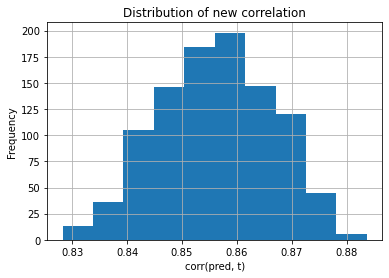

In [18]:
# Plot distribution of new correlation
corr_df['corr'].hist()
plt.xlabel('corr(pred, t)')
plt.ylabel('Frequency')
plt.title("Distribution of new correlation")

Then we check the relationship between new correlation and corr(a, t), corr(b, t). From the graphs, it is obvious that new correlation is always larger than corr(a, t) and corr(b, t) hence proved that it is greater than 0.85 if corr(a, t) = 0.85

Text(0.5, 1.0, 'corr(a, t) vs. corr(pred, t)')

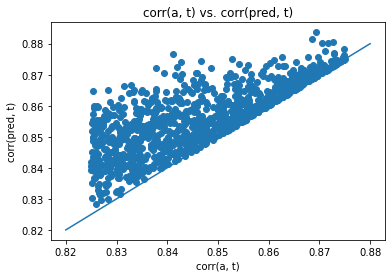

In [19]:
# corr(a, t)  vs. corr(pred, t)
lineA = np.linspace(0.82, 0.88, 100)
plt.plot(lineA, lineA) # y = x

plt.scatter(corr_df['corrA'], corr_df['corr'])
plt.xlabel('corr(a, t)')
plt.ylabel('corr(pred, t)')
plt.title("corr(a, t) vs. corr(pred, t)")

Text(0.5, 1.0, 'corr(b, t) vs. corr(pred, t)')

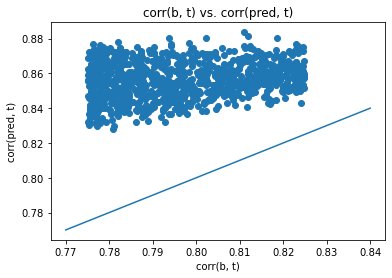

In [20]:
# corr(b, t)  vs. corr(pred, t)
lineB = np.linspace(0.77, 0.84, 100)
plt.plot(lineB, lineB) # y = x

plt.scatter(corr_df['corrB'], corr_df['corr'])
plt.xlabel('corr(b, t)')
plt.ylabel('corr(pred, t)')
plt.title("corr(b, t) vs. corr(pred, t)")